In [2]:
%pip install shapely

     ---------------------------------------- 1.4/1.4 MB 5.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import gpxpy
import gpxpy.gpx

from shapely.geometry import LineString, Point

def extract_coords(gpx_filename):
    with open(gpx_filename, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)

    latlngs = []
    for track in gpx.tracks:
        for segment in track.segments:
            # Pobierz co dziesiąty punkt z segmentu
            for i, point in enumerate(segment.points):
                if i % 20 == 0:
                    latlngs.append([point.latitude, point.longitude])

    return latlngs
    

def create_linestring_from_gpx(file_path):
    punkty_trasy = []

    with open(file_path, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)
        for track in gpx.tracks:
            for segment in track.segments:
                for point in segment.points:
                    punkty_trasy.append((point.latitude, point.longitude))
    
    # Tworzymy linię z punktów trasy
    linia_trasy = LineString(punkty_trasy)

    # W tym momencie punkty kontrolne są nieznane, musisz znać ich indeksy lub inne metody identyfikacji
    # Przykładowo, jeśli punkty kontrolne są zawsze na pozycjach 2 i 4:
    marker_3 = Point(punkty_trasy[2])
    marker_5 = Point(punkty_trasy[4])

    return linia_trasy, marker_3, marker_5

# Użycie funkcji
linia_trasy, marker_3, marker_5 = create_linestring_from_gpx('track1.gpx')


# Użycie funkcji
gpx_filename = 'track.gpx'  # Zastąp swoją nazwą pliku
latlngs = extract_coords(gpx_filename)

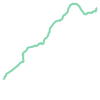

In [3]:
linia_trasy
